<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/1_Data_cleaning_(YandexPracticum_eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Creditworhtness analysis

<b>Task:</b> 
- Clean data 
- Evaluate whether the marital status or the number of children affects loan repayment.

<b>Data description:</b>
- children — number of children
- days_employed — total work experience in days
- dob_years — age
- education 
- education_id 
- family_status 
- family_status_id 
- gender 
- income_type 
- debt — (1 - debt, 0 - none)
- total_income - monthly income
- purpose — purpose for a loan

### Stage 1. Get data

#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading csv file 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


#### Searching for missing data, duplicate values. Checking data types.

In [ ]:
df.shape

(21525, 12)

In [ ]:
df.duplicated().sum()

54

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isnull().sum().sum()

4240

In [ ]:
df.isnull().sum()

children               0
days_employed       2120
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2120
purpose                0
dtype: int64

In [ ]:
df.isnull().mean().round(3)

children            0.000
days_employed       0.099
dob_years           0.000
education           0.000
education_id        0.000
family_status       0.000
family_status_id    0.000
gender              0.000
income_type         0.000
debt                0.000
total_income        0.099
purpose             0.000
dtype: float64

<b>Results:</b> The data frame consists of 12 columns, 21525 rows. Found 54 duplicates. According to the task we deleted duplicates. Two columns miss 9.9% of entries. Data types are not perfect in some columns. We will fix it on the next stage.

#### Getting descriptive statistics for the dataset

In [ ]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21471.000000,19351.000000,21471.000000,21471.000000,21471.000000,21471.000000,1.935100e+04
mean,0.539565,63046.497661,43.279074,0.817195,0.973685,0.081086,1.674223e+05
std,1.382978,140827.311974,12.574291,0.548508,1.421082,0.272974,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [ ]:
df[['education','family_status','gender','income_type','purpose']].describe()

,education,family_status,gender,income_type,purpose
count,21471,21471,21471,21471,21471
unique,15,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,13705,12344,14189,11091,793


### Data quality (Stage 1). 
By columns:
- children (the number of children in a family). There are negative values and too high positive values. Median = 0, i.e. more than half of borrowers do not have children.
- days_employed (work experience in days). Most values are negative (at least to 75th percentile) and the maximum value is too high (401755/365=1100 years). A float data type can be changed into an integer data type. Around 2000 entries are missing.
- dob_years (client's age in years). There are zero values. We can assume normal distribution as the median is almost equal to the mean.
- education (string), education_id (integer). The number of unique values is not the same in these columns (15 vs 5). Two columns is excessive. We can remove one of them.
- family_status (string), family_status_id (integer). 5 unique values. We can remove one of the columns.
- gender.  The column has 3 unique genders which could be a mistake.
- income_type. 8 unique values.
- debt (payment delinquency in the credit history) - 2 unique values - should be boolean.
- total_income (per month). Around 2000 entries are missing, which is similar to the days_employed column. Missing values could describe an unemployed person or be a mistake (can be checked by income_type). Data type float can be changed to integer.
- purpose (for the loan). 38 unique purposes which are too many for the analysis. Combining into several categories could be a solution.

### Stage 2. Data processing

#### Column: children. Checking distribution and fixing wrong values

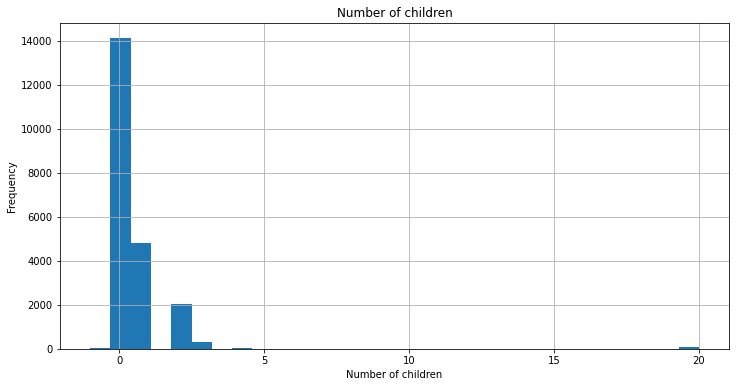

In [ ]:
df['children'].hist(bins=30, figsize=(12,6))
plt.title('Number of children')
plt.xlabel('Number of children')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [ ]:
df['children'] = df['children'].replace([-1,20],[1,2])
df['children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

<b>Conclusion:</b> Values 20 and -1 are mistakes. Overall, the percent of mistakes is low ((76+47)/21471 = 0.6%). According to the task we change these misprints to 2 and 1, respectively.

#### Column: dob_years. Check for wrong values

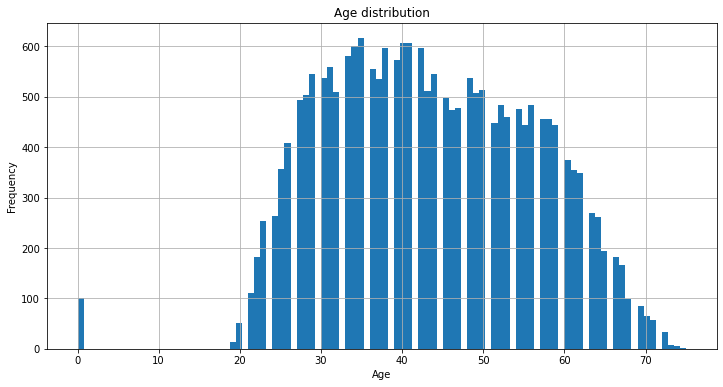

In [ ]:
df['dob_years'].hist(bins=100, figsize=(12,6))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[df['dob_years']==0]['dob_years'].count()

101

<b>Conclusion:</b>  0 value is wrong (children do not apply for a loan). The proportion of errors is small (101/21471 = 0.5%). We will change 0 to the average by income_type, as it allows us to choose a more precise age for each group (pensioners, students, etc.)

In [ ]:
for income_type in df['income_type'].unique():
    mean = round(df[df['income_type']==income_type]['dob_years'].mean(),1)
    print(income_type, mean)
    df.loc[(df['dob_years']==0)&(df['income_type']==income_type),'dob_years'] = mean

сотрудник 39.8
пенсионер 59.1
компаньон 39.7
госслужащий 40.6
безработный 38.0
предприниматель 42.5
студент 22.0
в декрете 39.0


In [ ]:
df[df['dob_years']==0]['dob_years'].count()

0

Alternative code:
    
`df['dob_years'] = df.groupby('income_type')['dob_years'].transform(lambda x: x.replace(0, int(x.median())))`


#### Columns: education and education_id. Check for errors

In [ ]:
df.groupby(['education_id','education'])['education_id'].count()

education_id  education          
0             ВЫСШЕЕ                   273
              Высшее                   268
              высшее                  4710
1             СРЕДНЕЕ                  772
              Среднее                  711
              среднее                13705
2             НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
              Неоконченное высшее       47
              неоконченное высшее      668
3             НАЧАЛЬНОЕ                 17
              Начальное                 15
              начальное                250
4             УЧЕНАЯ СТЕПЕНЬ             1
              Ученая степень             1
              ученая степень             4
Name: education_id, dtype: int64

In [ ]:
df['education'] = df['education'].str.lower()
df.groupby(['education_id','education'])['education_id'].count()

education_id  education          
0             высшее                  5251
1             среднее                15188
2             неоконченное высшее      744
3             начальное                282
4             ученая степень             6
Name: education_id, dtype: int64

In [ ]:
df.drop('education_id', axis=1, inplace=True)

<b>Conclusion:</b> There are duplicates in the education column. We fixed that by converting strings to lower case.  Also we removed education_id.

#### Columns: family_status и family_status_id. Check for errors

In [ ]:
df.groupby(['family_status_id','family_status'])['family_status_id'].count()

family_status_id  family_status        
0                 женат / замужем          12344
1                 гражданский брак          4163
2                 вдовец / вдова             959
3                 в разводе                 1195
4                 Не женат / не замужем     2810
Name: family_status_id, dtype: int64

In [ ]:
df['family_status'] = df['family_status'].str.lower()
df.groupby(['family_status_id','family_status'])['family_status_id'].count()

family_status_id  family_status        
0                 женат / замужем          12344
1                 гражданский брак          4163
2                 вдовец / вдова             959
3                 в разводе                 1195
4                 не женат / не замужем     2810
Name: family_status_id, dtype: int64

In [ ]:
df.drop('family_status_id', axis=1, inplace=True)

<b>Conclusion:</b>  Converted to lower case and deleted family_status_id

#### Column: gender. Check for errors

In [ ]:
df['gender'].value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [ ]:
df['gender'] = df['gender'].replace('XNA','F')
df['gender'].value_counts()

F    14190
M     7281
Name: gender, dtype: int64

<b>Conclusion:</b>  According to the task, XNA is a misprint. So we changed that value with the most popular gender (female).

#### Column: income_type. Check for errors

In [ ]:
df['income_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

<b>Conclusion:</b>  Looks good

#### Column: debt

In [ ]:
df['debt'].value_counts()

0    19730
1     1741
Name: debt, dtype: int64

<b>Conclusion:</b>   Looks good

#### Columns: total_income и days_employed. Checking missing values and mistakes

We will check both columns together as missing values in those columns are allegedly connected. Look at the rows with missing values in both columns:

In [ ]:
df[(df['total_income'].isnull())&(df['days_employed'].isnull())]

,children,days_employed,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
12,0,NaN,65.0,среднее,гражданский брак,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41.0,среднее,женат / замужем,M,госслужащий,0,NaN,образование
29,0,NaN,63.0,среднее,не женат / не замужем,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50.0,среднее,женат / замужем,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54.0,среднее,гражданский брак,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21435,2,NaN,47.0,среднее,женат / замужем,M,компаньон,0,NaN,сделка с автомобилем
21441,1,NaN,50.0,среднее,гражданский брак,F,сотрудник,0,NaN,свадьба
21443,0,NaN,48.0,высшее,женат / замужем,F,компаньон,0,NaN,строительство недвижимости
21448,1,NaN,42.0,среднее,женат / замужем,F,сотрудник,0,NaN,строительство жилой недвижимости


Empty values in total_income and days_employed are connected. The percentage of missing values: 2120/21471 = 10%. It is quite high to drop those rows. We can replace missing values in total_income with median by income type. So we measure the median in each income type:

In [ ]:
group_income = df.groupby('income_type')['total_income'].median()
group_income

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Different income types have different median incomes. Filling mising values with medians by income type: 

In [ ]:
for i in group_income.index:
    df.loc[(df['income_type'] == i) & (df['total_income'].isnull()), 'total_income'] = group_income[i]

df['total_income'].isnull().sum()

0

Alternative code:
```
med_salary = df.groupby('income_type')['total_income'].transform('median')
df['total_income'] = df['total_income'].fillna(med_salary)
```




We will add the years of work experience based on days_employed and check statistics:

In [ ]:
df['years_employed'] = df['days_employed'] / 365
df['years_employed'].agg(['mean','median','min','max'])

mean       172.730131
median      -3.296903
min        -50.380685
max       1100.699727
Name: years_employed, dtype: float64

Most of the values are negative (median is below 0). Wrong positive values increase the mean. The assumption is that in some income types work experience is shown in hours. Checking statistics by income_type:

In [ ]:
df.groupby('income_type')['years_employed'].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
income_type,,,,,
безработный,2,1003.873021,1003.873021,924.724567,1083.021476
в декрете,1,-9.032219,-9.032219,-9.032219,-9.032219
госслужащий,1312,-9.314786,-7.368132,-41.624746,-0.109463
компаньон,4577,-5.784998,-4.239403,-48.261817,-0.082727
пенсионер,3443,1000.009565,1000.584401,900.626632,1100.699727
предприниматель,1,-1.426981,-1.426981,-1.426981,-1.426981
сотрудник,10014,-6.373970,-4.312884,-50.380685,-0.066141
студент,1,-1.585621,-1.585621,-1.585621,-1.585621


The unemployed and retired (безработные и пенсионеры) have values which can be divided by 24 to get realistic years.

In [ ]:
def hours_to_days(row):
    if row['income_type'] == 'безработный' or row['income_type'] == 'пенсионер':
        return row['years_employed']/24
    else:
        return row['years_employed']

df['years_employed'] = df.apply(hours_to_days,axis=1)

Converting negative values into positive:

In [ ]:
df['years_employed'] = df['years_employed'].apply(abs)

df.groupby('income_type')['years_employed'].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
income_type,,,,,
безработный,2,41.828043,41.828043,38.530190,45.125895
в декрете,1,9.032219,9.032219,9.032219,9.032219
госслужащий,1312,9.314786,7.368132,0.109463,41.624746
компаньон,4577,5.784998,4.239403,0.082727,48.261817
пенсионер,3443,41.667065,41.691017,37.526110,45.862489
предприниматель,1,1.426981,1.426981,1.426981,1.426981
сотрудник,10014,6.373970,4.312884,0.066141,50.380685
студент,1,1.585621,1.585621,1.585621,1.585621


Filling the missing values with median by income_type:

In [ ]:
med_salary = df.groupby('income_type')['years_employed'].transform('median')
df['years_employed'] = df['years_employed'].fillna(med_salary)

df['years_employed'].isnull().sum()

0

There is no missing data in years_employed. We will remove days_employed as we do not need it.

In [ ]:
df = df.drop('days_employed', 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   children        21471 non-null  int64  
 1   dob_years       21471 non-null  float64
 2   education       21471 non-null  object 
 3   family_status   21471 non-null  object 
 4   gender          21471 non-null  object 
 5   income_type     21471 non-null  object 
 6   debt            21471 non-null  int64  
 7   total_income    21471 non-null  float64
 8   purpose         21471 non-null  object 
 9   years_employed  21471 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


#### Column purpose. Check for wrong values

In [ ]:
df['purpose'].value_counts()

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
операции с жильем                         652
покупка жилья для сдачи                   652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

There are duplicates in this column.

### Missing and wrong values summary

> - children - we found wrong values(-1 and 20), changed to 1 and 20 respectively, assuming that there were misprints.
> - days_employed - We found out that pensioners and the unemployed have positive values, while the others have negative ones. Work experience in those groups is shown in hours. We converted all values into years (years_employed) and filled missing values with median by income_type.
> - dob_years. We changed zero values with mean by income_type. 
> - education, education_id - we converted string values into lower case and decreased the number of unique values to 5.
> - family_status, family_status_id - we converted values into lower case.
> - gender - we found a misprint and changed it to the most popular gender (F).
> - income_type, debt - look good.
> - total_income - we filled missing values with median by income_type.
> - purpose - we found duplicates to deal with on the next stage.

#### Data type change

Change float to integer

In [ ]:
col_list = ['dob_years','total_income','years_employed']

for col in col_list:

    df[col] = df[col].astype('int')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   children        21471 non-null  int64 
 1   dob_years       21471 non-null  int64 
 2   education       21471 non-null  object
 3   family_status   21471 non-null  object
 4   gender          21471 non-null  object
 5   income_type     21471 non-null  object
 6   debt            21471 non-null  int64 
 7   total_income    21471 non-null  int64 
 8   purpose         21471 non-null  object
 9   years_employed  21471 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.6+ MB


#### Duplicates processing

Check for duplicates

In [ ]:
df.duplicated().sum()

17

<b>Conclusion: </b> We found 17 duplicates. According to the task we will remove them:

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

#### Data categorization

Back to purpose:

In [ ]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

We will define four categories: vehicle, real estate, marriage, and education - and create a column for them.

In [ ]:
def purpose_cat(row):
    if 'авто' in row:
      return 'vehicle'
    elif 'недвиж' in row or 'жиль' in row:
      return 'real estate'
    elif 'свадьб' in row:
      return 'marriage'
    elif 'образов' in row:
      return 'education'
        
df['purpose_cat'] = df['purpose'].apply(purpose_cat)

In [ ]:
df['purpose_cat'].value_counts(dropna=False)

real estate    10811
vehicle         4306
education       4013
marriage        2324
Name: purpose_cat, dtype: int64

Grouping dob_years into categories and checking the number of entries and how it affects debt.

In [ ]:
df['dob_years_cat'] = pd.qcut(df['dob_years'],5)
df.groupby('dob_years_cat')['debt'].agg(['count','mean'])

,count,mean
dob_years_cat,,
"(18.999, 32.0]",4785,0.110972
"(32.0, 39.0]",4132,0.091239
"(39.0, 47.0]",4316,0.078545
"(47.0, 56.0]",4348,0.065777
"(56.0, 75.0]",3873,0.053705


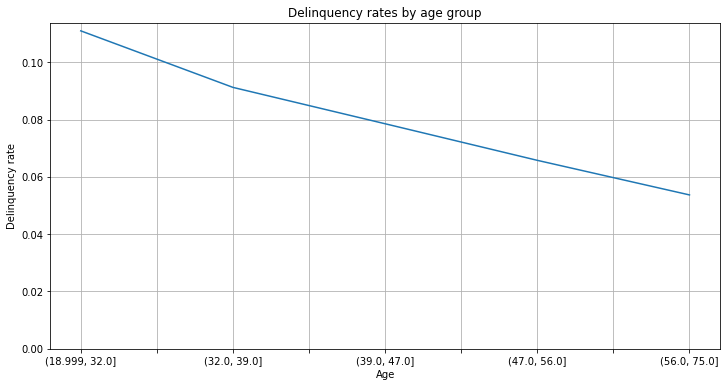

In [ ]:
df.groupby('dob_years_cat')['debt'].mean().plot(grid=True,ylim=0, figsize=(12,6))
plt.title('Delinquency rates by age group')
plt.xlabel('Age')
plt.ylabel('Delinquency rate')
plt.show()

It seems to be a dependency: the younger a borrower, the higher risk of delinquency.

Total_income categorization

In [ ]:
df['total_income_cat'] = pd.cut(df['total_income'],[20000,80000,120000,160000,200000, 400000, np.inf])

In [ ]:
df.groupby('total_income_cat')['debt'].agg(['count','mean'])

,count,mean
total_income_cat,,
"(20000.0, 80000.0]",2276,0.076450
"(80000.0, 120000.0]",4955,0.083148
"(120000.0, 160000.0]",5503,0.088497
"(160000.0, 200000.0]",3653,0.084862
"(200000.0, 400000.0]",4538,0.072058
"(400000.0, inf]",529,0.058601


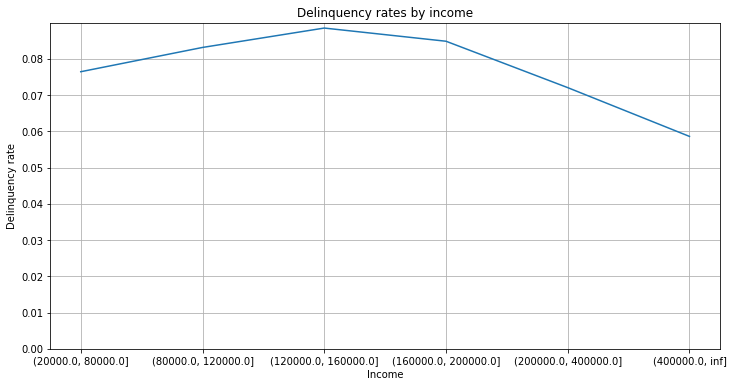

In [ ]:
df.groupby('total_income_cat')['debt'].mean().plot(grid=True,ylim=0, figsize=(12,6))
plt.title('Delinquency rates by income')
plt.xlabel('Income')
plt.ylabel('Delinquency rate')
plt.show()

Borrowers with an income range 120 000 - 200 000 are the riskiest clients. There should be a non-linear dependency.

Years_employed categirization

In [ ]:
def years_employed_cat(years_employed):
    if years_employed == 1:
        return '1_1'
    if years_employed >= 2 and years_employed <=3:
        return '2_2-3'
    if years_employed >= 4 and years_employed <=5:
        return '3_4-5'
    if years_employed >= 6 and years_employed <=10:
        return '4_6-10'
    if years_employed >= 10 and years_employed <=50:
        return '5_10-50'
    return '0'

df['years_employed_cat'] = df['years_employed'].apply(years_employed_cat)

In [ ]:
df.groupby('years_employed_cat')['debt'].agg(['count','mean'])

,count,mean
years_employed_cat,,
0,1827,0.105638
1_1,2024,0.117589
2_2-3,3438,0.100349
3_4-5,3945,0.080862
4_6-10,3695,0.078484
5_10-50,6525,0.054559


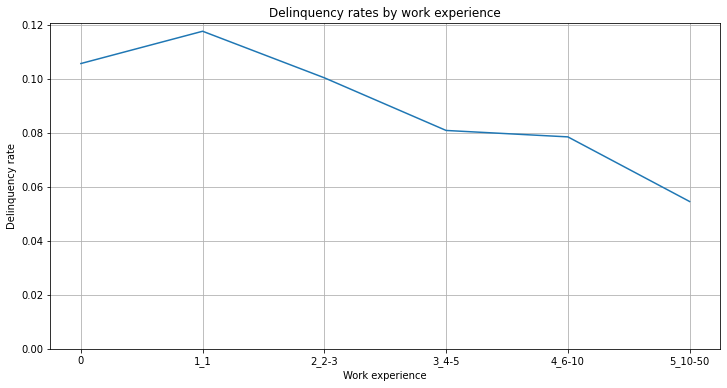

In [ ]:
df.groupby('years_employed_cat')['debt'].mean().plot(grid=True,ylim=0, figsize=(12,6))
plt.title('Delinquency rates by work experience')
plt.xlabel('Work experience')
plt.ylabel('Delinquency rate')
plt.show()

The highest probability of delinquency is for 1 year of work experience, then the risk is decreasing.

### Conclusion on categorization
We grouped total_income, years_employed, and dob_years into categories. It seems to be a correlation between those variables and the delinquency rate.

### Stage 3. Answering questions

#### Is there a relationship between the number of children and the repayment of the loan on time?

Measuring the average number of children for each value of debt:

In [ ]:
df.groupby('debt')['children'].mean().round(3)

debt
0    0.475
1    0.543
Name: children, dtype: float64

Borrowers who do not pay on time have more children on average. Checking delinquency rate by the number of children:

In [ ]:
df.groupby('children')['debt'].mean().round(3)

children
0    0.075
1    0.092
2    0.095
3    0.082
4    0.098
5    0.000
Name: debt, dtype: float64

In [ ]:
df['children'].value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

<b>Conclusion:</b>
Children increase the risk of delinquency (there is growth from 7 to 9% between 0 and 1 child). Among borrowers with children, the delinquency rate fluctuates. Families with 3 children are the most reliable borrowers (apart from child-free families).

#### Is there a relationship between marital status and loan repayment on time?

We will look at average debt by family_status.

In [ ]:
df.groupby('family_status')['debt'].mean()

family_status
в разводе                0.071130
вдовец / вдова           0.065693
гражданский брак         0.093471
женат / замужем          0.075452
не женат / не замужем    0.097509
Name: debt, dtype: float64

In [ ]:
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

<b>Conclusion:</b>The highest risk of not paying off on time is among common-law partners and single borrowers. However, there could be an influence of age: married or divorced people are usually older than unmarried borrowers.

Checking a relationship between family_status and age, and the delinquency risk in different age groups:

In [ ]:
df.groupby('family_status')['dob_years'].agg(['mean','median'])

,mean,median
family_status,,
в разводе,45.879498,46
вдовец / вдова,56.811262,58
гражданский брак,42.271983,41
женат / замужем,43.715131,43
не женат / не замужем,38.614235,36


In [ ]:
df.groupby('dob_years_cat')['debt'].agg(['mean','median'])

,mean,median
dob_years_cat,,
"(18.999, 32.0]",0.110972,0
"(32.0, 39.0]",0.091239,0
"(39.0, 47.0]",0.078545,0
"(47.0, 56.0]",0.065777,0
"(56.0, 75.0]",0.053705,0


People who are married, divorced or widowed are older. The older a borrower, the less the risk of not paying back on time. 

#### Is there a relationship between income level and loan repayment on time?

We will look at mean and median income in both groups and the average delinquency rate by income categories:

In [ ]:
df.groupby('debt')['total_income'].agg(['mean','median'])

,mean,median
debt,,
0,165687.076599,142594
1,161158.393452,142594


In [ ]:
df.groupby('total_income_cat').agg({'debt': 'mean'})

,debt
total_income_cat,
"(20000.0, 80000.0]",0.076450
"(80000.0, 120000.0]",0.083148
"(120000.0, 160000.0]",0.088497
"(160000.0, 200000.0]",0.084862
"(200000.0, 400000.0]",0.072058
"(400000.0, inf]",0.058601


<b>Conclusion:</b>
There is a relationship between the delinquency rate and income: middle and upper-middle levels (120 000 - 160 000) show the highest delinquency rate, while the lowest risk is among high income borrowers.

#### How do different purposes of a loan affect its return on time?

[We will look at mean debt by purpose categories

In [ ]:
df.groupby('purpose_cat')['debt'].mean()

purpose_cat
education      0.092200
marriage       0.080034
real estate    0.072334
vehicle        0.093590
Name: debt, dtype: float64

<b>Conclusion:</b>
The past-due rate is higher for auto and education loans, whereas mortgages and wedding loans show a lower rate of delinquency.

### Stage 4. Conclusion

We can assume a relationship between the number of children and the delinquency rate, having children increases the risk of delinquency. 

Marital status also affects the delinquency rate. Unmarried borrowers have the highest risk, while widowed borrowers show the lowest risk. However, it could be influenced by age (unmarried clients are younger, whereas widowed borrowers are older). 

Income also affects the probability of paying off on time: middle and upper-middle levels show the highest delinquency rate, whereas the borrowers with high income are the most reliable ones.

Loan purposes also affect the delinquency rate, marriage loans, and mortgages are paid off on time more frequently than education and auto loans.